STEP 1: Extracting coordination sphere from CIF
Detected mCIF (magnetic CIF) file

Structure Information
Formula: HoFeO3
Space group: ('Pnma', 62)

Unit cell parameters:
  a = 5.5825 Å
  b = 7.5845 Å
  c = 5.2680 Å

AUTO-DETECTING METAL CENTER
Found 8 potential metal center(s):
  [0] Ho  at [0.0693 0.25   0.979 ] (suggested cutoff: 3.5 Å)
  [1] Ho  at [0.4307 0.75   0.479 ] (suggested cutoff: 3.5 Å)
  [2] Ho  at [0.9307 0.75   0.021 ] (suggested cutoff: 3.5 Å)
  [3] Ho  at [0.5693 0.25   0.521 ] (suggested cutoff: 3.5 Å)
  [4] Fe  at [0.  0.  0.5] (suggested cutoff: 3.0 Å)
  [5] Fe  at [0.5 0.  0. ] (suggested cutoff: 3.0 Å)
  [6] Fe  at [0.5 0.5 0. ] (suggested cutoff: 3.0 Å)
  [7] Fe  at [0.  0.5 0.5] (suggested cutoff: 3.0 Å)

Using: Ho at index 0
Auto-detected coordination cutoff: 2.89 Å

Selected Configuration
Metal center: Ho
Index: 0
Cartesian: [0.38686725 1.896125   5.157372  ]
Fractional: [0.0693 0.25   0.979 ]
Coordination cutoff: 2.89 Å

Found 8 ligands within 2.889949671054

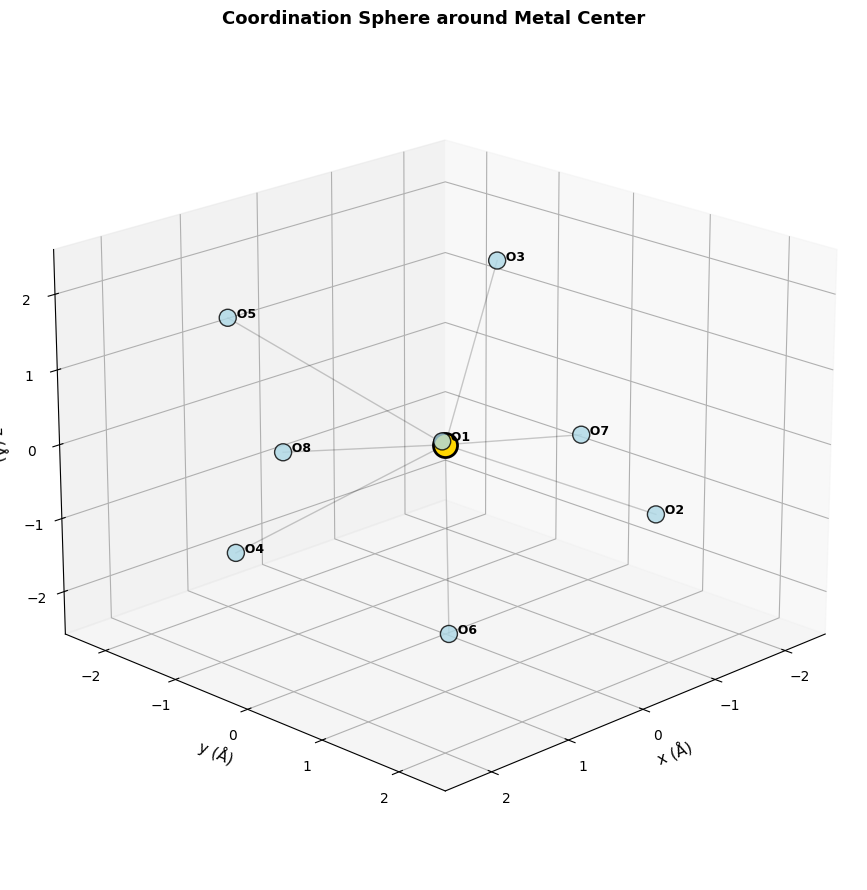


STEP 2: Determining electron configuration
Detected metal: Ho
Lanthanide Ho3+: f10 configuration

STEP 3: Calculating crystal field parameters (Bₖᵍ)

Crystal field parameters (cm⁻¹):

k = 2:
  B2,  0 =   767.964322
  B2,  1 =  -609.786834
  B2,  2 =  -214.282233

k = 4:
  B4,  0 =   198.746018
  B4,  1 =   829.695291
  B4,  2 =    65.620070
  B4,  3 =   128.297870
  B4,  4 =   221.816444

k = 6:
  B6,  0 =  -230.688422
  B6,  1 =   -53.830215
  B6,  2 =   -60.057933
  B6,  3 =   -11.476440
  B6,  4 =   145.629716
  B6,  5 =   -45.908201
  B6,  6 =   -86.738225

STEP 4: Free ion parameters

Free ion parameters for Ho3+ (f10):
  F² = 124214.0 cm⁻¹
  F⁴ =  77768.0 cm⁻¹
  F⁶ =  55899.0 cm⁻¹
  ζ  =   2165.0 cm⁻¹

STEP 5: Building Hamiltonian and calculating energy levels

Configuration: f10
Number of microstates: 1001
Almost closed Shell, corresponding configuration: f4
Ground state only calculation
Basis set reduced to: 17

Performing calculation with the following contributions: 
['Hee',

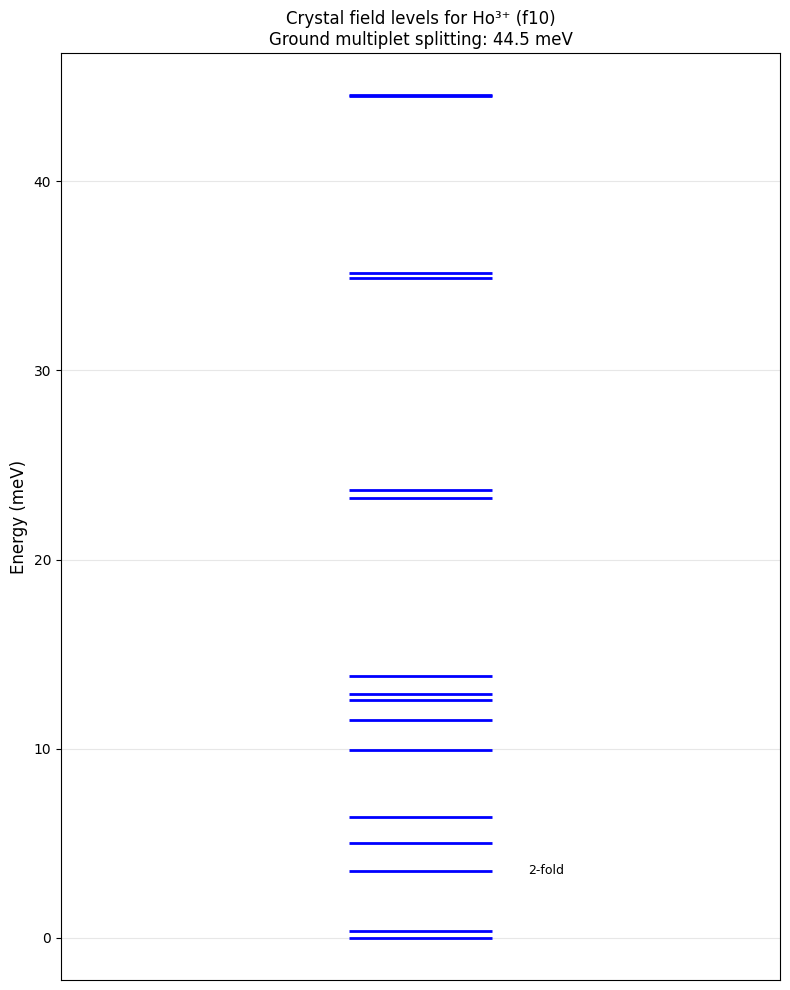


STEP 8: Saving results

Results saved:
  - eigenvalues.npy
  - eigenvalues_meV.txt
  - eigenvectors.npy
  - eigenvectors.txt
  - energy_levels_meV.txt
  - bkq_parameters.txt
  - coordination_sphere.txt

CALCULATION COMPLETE!


In [ ]:
# Complete workflow for crystal field calculation - GENERAL VERSION with meV output
# Just change CIF_FILE path and optionally adjust METAL_ELEMENT if auto-detection fails

import numpy as np
import matplotlib.pyplot as plt
import nja_cfs_red as nja
from cif_parser import parse_cif_to_nja, cif_to_bkq, visualize_coordination_sphere

# ============================================================================
# CONFIGURATION - EDIT THIS SECTION ONLY
# ============================================================================

CIF_FILE = r'C:\Users\Timur\Documents\Python_Scripts\crystal-hub\cif_files\0.994_HoFeO3.mcif'

# Optional: Specify metal center manually (set to None for auto-detection)
METAL_ELEMENT = None  # e.g., 'Yb', 'Ho', 'Tb', or None

# Optional: Specify coordination cutoff manually (set to None for auto-detection)
COORDINATION_CUTOFF = None  # e.g., 3.5, or None

# Optional: Override default charges if needed
CUSTOM_CHARGES = None  # e.g., {'Ho': 3.0, 'Fe': 3.0, 'O': -2.0} or None

# Conversion factor
CM_TO_MEV = 0.123984193  # 1 cm⁻¹ = 0.123984193 meV

# ============================================================================
# STEP 1: Parse CIF and extract coordination sphere
# ============================================================================

print("=" * 70)
print("STEP 1: Extracting coordination sphere from CIF")
print("=" * 70)

coordination_data = parse_cif_to_nja(
    cif_file=CIF_FILE,
    metal_center=METAL_ELEMENT,
    coordination_cutoff=COORDINATION_CUTOFF,
    charge_dict=CUSTOM_CHARGES,
    output_file='coordination_sphere.txt',
    auto_detect=True
)

visualize_coordination_sphere(
    coordination_data, 
    metal_label='Metal Center',
    save_fig=None,
    show_charges=True
)

# ============================================================================
# STEP 2: Determine electron configuration
# ============================================================================

print("\n" + "=" * 70)
print("STEP 2: Determining electron configuration")
print("=" * 70)

if METAL_ELEMENT is None:
    from pymatgen.io.cif import CifParser
    from cif_parser import detect_metal_centers
    
    parser = CifParser(CIF_FILE)
    structure = parser.parse_structures(primitive=False)[0]
    metal_centers = detect_metal_centers(structure)
    
    if metal_centers:
        metal_element = metal_centers[0][1]
    else:
        raise ValueError("Could not auto-detect metal center")
else:
    metal_element = METAL_ELEMENT.rstrip('0123456789+-')

print(f"Detected metal: {metal_element}")

lanthanide_configs = {
    'La': 'f0',  'Ce': 'f1',  'Pr': 'f2',  'Nd': 'f3',
    'Pm': 'f4',  'Sm': 'f5',  'Eu': 'f6',  'Gd': 'f7',
    'Tb': 'f8',  'Dy': 'f9',  'Ho': 'f10', 'Er': 'f11',
    'Tm': 'f12', 'Yb': 'f13', 'Lu': 'f14'
}

transition_configs_3plus = {
    'Ti': 'd1', 'V': 'd2',  'Cr': 'd3', 'Mn': 'd4',
    'Fe': 'd5', 'Co': 'd6', 'Ni': 'd7', 'Cu': 'd8'
}

if metal_element in lanthanide_configs:
    configuration = lanthanide_configs[metal_element]
    print(f"Lanthanide {metal_element}3+: {configuration} configuration")
elif metal_element in transition_configs_3plus:
    configuration = transition_configs_3plus[metal_element]
    print(f"Transition metal {metal_element}3+: {configuration} configuration")
else:
    raise ValueError(f"Unknown configuration for {metal_element}")

# ============================================================================
# STEP 3: Calculate crystal field parameters
# ============================================================================

print("\n" + "=" * 70)
print("STEP 3: Calculating crystal field parameters (Bₖᵍ)")
print("=" * 70)

dic_bkq = nja.calc_Bkq(
    coordination_data,
    configuration,
    sph_flag=False,
    sth_param=True
)

print("\nCrystal field parameters (cm⁻¹):")
for k in sorted(dic_bkq.keys(), key=int):
    print(f"\nk = {k}:")
    for q in sorted(dic_bkq[k].keys(), key=lambda x: int(x)):
        value = dic_bkq[k][q]
        if abs(value) > 1e-6:
            print(f"  B{k:s},{q:>3s} = {value:12.6f}")

# ============================================================================
# STEP 4: Get free ion parameters
# ============================================================================

print("\n" + "=" * 70)
print("STEP 4: Free ion parameters")
print("=" * 70)

free_ion_params = nja.free_ion_param_f_HF(configuration)

print(f"\nFree ion parameters for {metal_element}3+ ({configuration}):")
print(f"  F² = {free_ion_params['F2']:8.1f} cm⁻¹")
print(f"  F⁴ = {free_ion_params['F4']:8.1f} cm⁻¹")
print(f"  F⁶ = {free_ion_params['F6']:8.1f} cm⁻¹")
print(f"  ζ  = {free_ion_params['zeta']:8.1f} cm⁻¹")

# ============================================================================
# STEP 5: Build Hamiltonian and calculate energy levels
# ============================================================================

print("\n" + "=" * 70)
print("STEP 5: Building Hamiltonian and calculating energy levels")
print("=" * 70)

calc = nja.calculation(configuration, 
                        ground_only=True, # naturally limits the calculation to the ground multiplet (e.g., 17 states for Ho³⁺ instead of 1001)
                        TAB=True,
                        wordy=True)

result = calc.MatrixH(
    ['Hee', 'Hso', 'Hcf'],
    F2=free_ion_params['F2'],
    F4=free_ion_params['F4'],
    F6=free_ion_params['F6'],
    zeta=free_ion_params['zeta'],
    dic_bkq=dic_bkq,
    wordy=True,
    ground_proj=True,
    return_proj=True
)

if isinstance(result, tuple):
    energy_result, projections = result
    eigenvalues = energy_result[0, :].real
    eigenvectors = energy_result[1:, :]
else:
    eigenvalues = result[0, :].real
    eigenvectors = result[1:, :]
    projections = None

energies_relative_cm = eigenvalues - eigenvalues[0]
energies_relative_meV = energies_relative_cm * CM_TO_MEV

# ============================================================================
# STEP 6: Analyze results
# ============================================================================

print("\n" + "=" * 70)
print("STEP 6: Results summary")
print("=" * 70)

print(f"\nTotal number of states (ground multiplet): {len(energies_relative_meV)}")
print(f"Ground state energy: {eigenvalues[0]:.3f} cm⁻¹ ({eigenvalues[0]*CM_TO_MEV:.3f} meV)")
print(f"Crystal field splitting: {energies_relative_cm[-1]:.3f} cm⁻¹ ({energies_relative_meV[-1]:.3f} meV)")

print(f"\nEnergy levels (relative to ground state):")
print("-" * 50)
unique_energies, counts = np.unique(np.round(energies_relative_meV, 3), return_counts=True)
for i, (E, deg) in enumerate(zip(unique_energies, counts)):
    deg_str = f" ({deg}-fold)" if deg > 1 else ""
    print(f"  Level {i+1:3d}: {E:10.3f} meV{deg_str}")

# Ground state analysis
print("\n" + "=" * 70)
print("Ground state doublet analysis")
print("=" * 70)

if len(eigenvalues) > 1:
    doublet_splitting_cm = energies_relative_cm[1]
    doublet_splitting_meV = doublet_splitting_cm * CM_TO_MEV
    print(f"Ground doublet splitting: {doublet_splitting_meV:.6f} meV ({doublet_splitting_cm:.6f} cm⁻¹)")
    
    try:
        magn = nja.Magnetics(
            calc,
            ['Hee', 'Hso', 'Hcf'],
            {'F2': free_ion_params['F2'], 'F4': free_ion_params['F4'], 
             'F6': free_ion_params['F6'], 'zeta': free_ion_params['zeta'], 
             'dic_bkq': dic_bkq},
            wordy=False
        )
        
        g_values, g_directions = magn.effGval(
            levels=[0, 1],
            v_matrix=eigenvectors
        )
        
        print("\nEffective g-tensor for ground Kramers doublet:")
        print(f"  g₁ = {g_values[0]:.4f}")
        print(f"  g₂ = {g_values[1]:.4f}")
        print(f"  g₃ = {g_values[2]:.4f}")
        print(f"\nAnisotropy: Δg = {np.max(g_values) - np.min(g_values):.4f}")
        print(f"Average: ḡ = {np.mean(g_values):.4f}")
    except Exception as e:
        print(f"Could not calculate g-tensor: {e}")

# ============================================================================
# STEP 7: Visualize energy level diagram
# ============================================================================

print("\n" + "=" * 70)
print("STEP 7: Creating energy level diagram")
print("=" * 70)

fig, ax = plt.subplots(figsize=(8, 10))

tolerance = 0.05 * CM_TO_MEV  # meV
plotted_levels = []

for E_meV in energies_relative_meV:
    is_new_level = True
    for prev_E in plotted_levels:
        if abs(E_meV - prev_E) < tolerance:
            is_new_level = False
            break
    
    if is_new_level:
        plotted_levels.append(E_meV)
        deg = np.sum(np.abs(energies_relative_meV - E_meV) < tolerance)
        
        ax.hlines(E_meV, 0.4, 0.6, colors='blue', linewidth=2)
        
        if deg > 1:
            ax.text(0.65, E_meV, f'{deg}-fold', va='center', fontsize=9)

ax.set_xlim(0, 1)
ax.set_ylabel('Energy (meV)', fontsize=12)
ax.set_title(f'Crystal field levels for {metal_element}³⁺ ({configuration})\nGround multiplet splitting: {energies_relative_meV[-1]:.1f} meV', 
             fontsize=12)
ax.set_xticks([])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 8: Save results
# ============================================================================

print("\n" + "=" * 70)
print("STEP 8: Saving results")
print("=" * 70)

np.save('eigenvalues.npy', eigenvalues)
np.save('eigenvectors.npy', eigenvectors)

np.savetxt('eigenvalues_meV.txt', energies_relative_meV, 
           header=f'Eigenvalues for {metal_element}3+ ({configuration})\nEnergy relative to ground (meV)\nGround multiplet only',
           fmt='%15.6f')

np.savetxt('eigenvectors.txt', eigenvectors, 
           header=f'Eigenvectors for {metal_element}3+ ({configuration})\nRows: basis states, Columns: eigenstates',
           fmt='%15.8e')

with open('energy_levels_meV.txt', 'w') as f:
    f.write(f"Energy levels for {metal_element}3+ ({configuration})\n")
    f.write(f"Ground multiplet crystal field splitting\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Ground state energy: {eigenvalues[0]*CM_TO_MEV:.6f} meV ({eigenvalues[0]:.6f} cm^-1)\n")
    f.write(f"Crystal field splitting: {energies_relative_meV[-1]:.6f} meV ({energies_relative_cm[-1]:.6f} cm^-1)\n\n")
    f.write("Level    Energy (meV)    Energy (cm^-1)    Degeneracy\n")
    f.write("-" * 65 + "\n")
    for i, (E_meV, deg) in enumerate(zip(unique_energies, counts)):
        E_cm = E_meV / CM_TO_MEV
        f.write(f"{i+1:5d}    {E_meV:12.6f}    {E_cm:12.6f}    {deg:5d}\n")

with open('bkq_parameters.txt', 'w') as f:
    f.write(f"Crystal field parameters (Bkq) for {metal_element}3+ ({configuration})\n")
    f.write("=" * 60 + "\n\n")
    for k in sorted(dic_bkq.keys(), key=int):
        f.write(f"k = {k}:\n")
        for q in sorted(dic_bkq[k].keys(), key=lambda x: int(x)):
            value = dic_bkq[k][q]
            if abs(value) > 1e-10:
                f.write(f"  B{k},{q:>3s} = {value:15.8f} cm^-1\n")
        f.write("\n")

print("\nResults saved:")
print("  - eigenvalues.npy")
print("  - eigenvalues_meV.txt")
print("  - eigenvectors.npy")
print("  - eigenvectors.txt")
print("  - energy_levels_meV.txt")
print("  - bkq_parameters.txt")
print("  - coordination_sphere.txt")

print("\n" + "=" * 70)
print("CALCULATION COMPLETE!")
print("=" * 70)